

<h2><center>Lecture 3.1</center></h2>
<h2><center>Code refactoring ideas, more nested loops</center></h2>
<h4><center>Introduction to Computer Science</center></h4>
<h4><center>Dr. Arie Schlesinger, HUJI, Spring 2020</center></h4>


### Size of a function code

Keep functions shorter than a page, (easier to grasp),it's hard to keep track of indentation on more pages. <br>
The median size of our functions is 15 lines; the mean is 19 lines.<br>

*From *Software tools in Pascal*, 1981<br>
*by Brian Kernigham and P.J. Plauger - C language creators..:*<br>




### Example 1: 
Write a function that returns the first index of a target element in a sequence (say list), if not found return -1 (like the methods find(), index() of sequences). 3 methods: 

### Method 1

In [ ]:
def indx1(lst, target):  # standard ideas 
    """look for an object (a target) in a container: 
    use while as the fast car to visit the container members
    if not found, return -1"""
    
    # do we have an empty list ? return -1
    if lst == []:
        return -1
 
    # search limits initialization - איתחול גבולות החיפוש
    n = 0
    length = len(lst)
    
    # var to hold the index of the target - if found, else value stays -1
    found = -1
     
    # main engine to visit the list
    while n != length:    # is n < length different than this condition ?
        if lst[n] == target:
            found = n
            break 
        n += 1
    return found



In [ ]:
indx1([2, 1, 55, 33, 44, 777, 11, -2], 10)

### Method 2 

In [ ]:
def indx2(lst, target):
    """Look for target in container lst using for loop"""
    
    for n in range(len(lst)):
        if lst[n] == target: 
            return n
    return -1

In [ ]:
list(range(0))

In [ ]:
for i in range(len([])):
    print('Does it work on empty lists ?')
              

In [ ]:
indx2([2, 1, 55, 33, 44, 777, 11, -2], 10)

### Method 3 

In [ ]:
[1,2,'a'].index('a')


In [ ]:
[1,2,'a'].index('x')

In [ ]:
'x' in [1,2,'a']  # better first use "in" to check if obj is in the container

`in` works fine for all containers

In [ ]:
# index() raises an exception if target is not found therefore we use a try/except construct
# try/except is presented in the other part of the lecture

def indx3(lst, target): 
    try:
        return lst.index(target)
    except:
        return -1

In [ ]:
indx3([2, 1, 55, 33, 44, 777, 11, -2], 11)

### Refactoring tips
Instead of writing :<br>

`if n > 0:
    return True
else:
    return False`
    
we could write:

`return n > 0`

### Example 2:
Refactor the following code

In [ ]:
if k > 0:
    if s in ['X', 'Y', 'Z']:
        return True
    else:
        return False
else:
    return False

### Answer can be one liner:

In [ ]:
 return (k > 0) and (s in ['X', 'Y', 'Z']).

### DeMorgan’s laws:<br>
` not (A and B) == (not A) or (not B) 
 not (A or B) == (not A) and (not B)`

But negations are harder to parse than positive statements.

Apply DeMorgan’s laws and refactor the following loop body.

`for n in range(a):
    if not cond or x >= y:
       statement(s)`
       
can be refactored to :

`for n in range(a):
    if cond and (x < y):
        continue
    statement(s)`

##### Syntax note

`if st` with skinny blocks (1 st) like:<br>

`
if cond : 
    statement1
else: 
    statement2`

can also be written as :<br>

`    
if cond : statement1
else: statement2
`

### multiple ifs, possible logical error "traps"
Examples:

In [ ]:
# example 1
x = 0
if x == 0: 
    x = 1
if x == 1: 
    x = 2
if x == 2: 
    x = 3
print(x) # 3 ?

### multiple ifs, with a final else
Simple `ifs` are easier to debug than `else ifs`.

In [ ]:
# example 2
x = 0
if x == 0: 
    x = 1
if x == 2: 
    x = 3
else: 
    x = 4
print(x) # 4?


#### Improve by using ` returns`, `breaks`, and `continues`  ( ׳שמפריעים׳ לזרימה הרגילה) can make code easier to debug.

In [ ]:
# return: just "leave the function scene"
def x_changer(x):
    if x == 0:
        return 1
    if x == 1:
        return 2
    if x == 2:
        return 3
    

In [ ]:
# creative  but needs "protection" against out-of-range values of x
def x_changer(x):
     return [1, 2, 3][x]

In [ ]:
x_changer(2)

#### Another `if` refactor

#### What about refactoring this  `if` spaghetti ?

In [ ]:
x = 1
y = 1
z = 0

if x == 1:
    if y == 1:
        if z == 1:
            print ('xyz')
        else:
            print ('xy.')
    else:
        if z == 1:
            print('x.z')
        else:
            print('x..')

else:
    if y == 1:
        if z == 1:
            print ('.yz')
        else:
            print('.y.')
    else:
        if z == 1:
            print('..z')
        else:
            print ("...")

#### First try - 8 consecutive if's 

In [ ]:
x = 1
y = 1
z = 0
if x == 1 and y == 1 and z == 1: print('xyz')
if x == 1 and y == 1 and z == 0: print('xy.')
if x == 1 and y == 0 and z == 1: print('x.z')
if x == 0 and y == 1 and z == 1: print('.yz')
if x == 0 and y == 0 and z == 1: print('..z')
if x == 0 and y == 1 and z == 0: print('.y.')
if x == 1 and y == 0 and z == 0: print('x..')
if x == 0 and y == 0 and z == 0: print('...')


#### Second try  - still 8 but simpler, using tuples equality op
and remember that `(x, y, z) == (1, 1, 1)` checks values equality <br>
and `(x, y, z) is (1, 1, 1)` checks addresses equality.

In [ ]:
    if (x, y, z) == (1, 1, 1): print('xyz')
    if (x, y, z) == (1, 1, 0): print('xy.')
    if (x, y, z) == (1, 0, 1): print('x.z')
    if (x, y, z) == (1, 0, 0): print('x..')
    if (x, y, z) == (0, 1, 1): print('.yz')
    if (x, y, z) == (0, 1, 0): print('.y.')
    if (x, y, z) == (0, 0, 1): print('..z')
    if (x, y, z) == (0, 0, 0): print('...')


Could we use lists instead of tuples ? 

In [ ]:
x = y = z = 1
if [x, y, z] == [1, 1, 1]: print('We accept lists too')


### In the same spirit : more unpacking magic by the `for loop`  - the iterables Maestro : 

In [ ]:
# Only if every object in the container can be unpacked in 2
for a,b,c in ("Hyi","Bye"):
    print(a,b,c)

In [ ]:
for a,b in (-1, 34):
    print(a,b)

In [ ]:
# this will not work as maybe some expect
for a,b in "Hi By":
    print(a,b)

In [ ]:
# But this will
for a,b in "hI bY".split():
    print(a,b)

In [ ]:
# each member of the iterable has 3 elements
for i, j, k in ['xyz', [111, [123], (3.14,'x')], ('Avi', (((),),), (-1,))] :
    print(i, j, k)

<h2><center>Loops and nested Loops</center></h2>

### Nested loops

`
for var1 in iterable1:
   for var2 in iterable2:
      statements(s)
   statements(s)
`

`
while cond1:
   while cond2:
      statement(s)
   statement(s)
`

Example:

In [ ]:
lst_of_words = ['humus', 'pita', 'salad', 'yogurt']
lst_of_letters = [ ]
for word in lst_of_words:
    for let in word:
        lst_of_letters.append(let)
print(lst_of_letters)


##### Exercise:
Modify the code so that the list would contains a single copy of each letter.

#### Addressing inner objects within inner objects

In [ ]:
L = [[1, 2], ['a', 'b']]
print(L[1])
print(L[0][1])


In [ ]:
L[1][0] = 'Python'
print(L)

In [ ]:
del L[1][0]
print(L)

Small changes in code  - examples

In [ ]:
# version 1
lst = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
f = 1
print(lst)
for i in range(0, 3):
    f *= 10
    for j in range(0, 3):
        lst[i][j] *= f
print(lst)


In [ ]:
# version 2
lst1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
f = 1
print(lst1)
for i in range(0, 3):
    f *= 10
    for j in range(0, 3):
        lst1[i][j] *= f
        if lst1[i][j] >= 400:
            break
print(lst1)


In [ ]:
# version 3
lst2 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
f = 1
print(lst2)
for i in range(0, 3):
    f *= 10
    for j in range(0, 3):
        lst2[i][j] *= f
    if lst2[i][j] >= 400:
        break
print(lst2)





### Nested while loops: finding the prime numbers between two numbers: 

In [ ]:
# find primes between i < k
i = int(input("Pls enter the lower int > 1 : "))
k = int(input("Pls enter the upper int: "))
while(i < k):
    j = 2
    while(j <= (i / j)):
        if not(i % j): break
        j = j + 1
    if (j > i / j) : print( i, " is prime")
    i = i + 1

print("Done")



### A family of nested Loops: 
#### printing  "right triangle" of stars /numbers

In [ ]:
str(78) # strings from numbers 


In [ ]:
# or from anything..
str([1,2])


In [ ]:
str([1,2])[3]

In [ ]:
# not nested and not numbers
n = 4
for i in range(n):
    print('*' * (i + 1))
    

In [ ]:
# using str()
for i in range(10):
    print(str(i) * i)
    

In [ ]:
# using int() to cast float result
n = 10
for i in range(1, n):
    print (int(i * ((10 ** i) -1) / 9))
    

#### one liner - the same effect with list comprehension construct...later

In [ ]:
print ('\n'.join([str(i) * i for i in range(1, 10)]))


In [ ]:
# with nested for
# each row has one repeated digit 
for i in range(1, 10):
    for j in range(i):
        print(i, end = '')
    print()
    

In [ ]:
# simple variant of the previous code
count = 1
for i in range(9):
    for j in range (-1, i):
        print (count, end = '')
    count = count + 1
    print (" ")
    

In [ ]:
# another variant
count = 0
for i in range(10):
    for j in range(0, i):
        print (count, end = '')
    count +=1
    print()
    

In [ ]:
# "smarter": each new row starts the same and "grows" : 123...
n = int(input("Pls enter an int: "))
for i in range(1, n + 1):
    for j in range(1, i + 1):
        print (j, end = '')
    print()
    

#### The same effect with list comprehension construct...late

In [ ]:
n = 9
print ('\n'.join(''.join([str(i) for i in range(1, j + 1)]) for j in range(1, n + 1)))


In [ ]:
# one more chalenge: stream the numbers 1-45  in triangular ordered rows.
# to make rows look symmetrically arranged, put a blanc in end = ''   

count = 1
for i in range(10):
    for j in range(0, i):
        print(count, end = '')
        count += 1
    print()


<h2><center>Nested Scopes and nested functions</center></h2>

A variable’s scope: the area of a program where a variable can be used in. <br>

The scope of a `local variable` starts from the line where it was defined, to the end of the function.


A `def` statement within a function body defines a `nested function`. <br>

The function that includes the `def` is called an `outer function` to the nested one. <br>

Code in a nested function can not rebind local variables of an outer function (unless using `global` which is bad programming), but can access/use them in expressions....


In [ ]:
# Example 1
def f(x,y): 
    """Calculate Percentages from the total"""
    def g(k):
        return (k * 100.0) / (x + y) 
    print('The results are:', g(x), g(y))


In [ ]:
f(23,137)

In [ ]:
# Example 2
def f1(x):
    def f2(y):
        x = 'Hi'
        print('x =', x) 
        return 2*y

    def f3():
        z = x
        print('z =', z) 

    x = x + 1
    print('x =', x) 
    f3()
    f2(x)
    print('x =', x) 
    return f2(x+1)

x = 3 
z = f1(x) 
print('x =', x) 
print('z =', z) 


<h2><center>More ways to Fibonacci</center></h2>

### The Golden Ratio -  על יחס הזהב

### Two numbers, a,b (a > b > 0) are in the golden ratio if  $\frac{a+b}{a}=\frac{a}{b}$ . The value of this ratio is : $\frac{1+\sqrt{5}}{2}$



## Binet formula for the n-th Fibonacci number:
(Binet,1843)

#### Binet formula uses the golden ration :




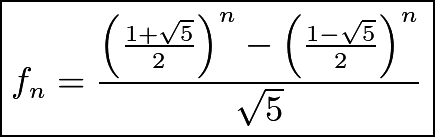

No series needed to get i-th element, so no initial or mid-way values needed to start the series going

In [ ]:
# implementation:
from math import sqrt
def binet_fibo(num): 
    root_5 = sqrt(5)
    x = (1 + root_5) / 2
    y = (1 - root_5) / 2
    return round(( x ** num - y ** num ) / root_5) 


In [ ]:
binet_fibo(8)


### Q Matrix
Another very interesting way to create fibonacci numbers

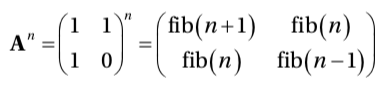

Can you implement this ? <br>
There are some very nice economy bonuses attached here (not from the intro course), like to get to fibonaci_23 and its index neighbours ( $A^{23}$ ), is enough to calculate these:<br>

$A^{23}$ = $A^{16}$ * $A^{4}$ * $A^{2}$ * $A^{1}$ which come as a power of 2 series. <br>

`(Matrix world is a wonder world by itself)`.


### Measuring time

from time import time<br>
....<br>
start = time()<br>
....<br>
stop = time()<br>
.....<br>
print('time =', round(stop-start, 2), 'seconds.') , <br>

or without rounding the time

In [ ]:
from math import sqrt
def binet_fibo(num): 
    root_5 = sqrt(5)
    x = (1 + root_5) / 2
    y = (1 - root_5) / 2
    return round(( x ** num - y ** num ) / root_5) 


In [ ]:
# with the timer:
from time import time, gmtime
start = time()
binet_fibo(1022)
stop = time()
print('time =', stop-start, 'seconds.')


In [ ]:
print(gmtime(0))

In [ ]:
print(time())
print(time())
print(time())
print(time())
print(time())
print(time())

In [ ]:
help(gmtime)


<h2><center>Additional code examples with loops</center></h2>


##### Square root approximation by Newton-Raphson method 

In [ ]:
# find the sqrt of a given pos number by Newton-Raphson method 
# Find x such that abs(x**2 - k) is less than a predefined eps

k = eval(input('Pls enter a positive number: '))
eps = 0.015    # the accuracy 'constant'
guess = k / 2.0

while abs(guess * guess - k) >= eps:
    print('old',guess)
    guess = guess - (((guess ** 2) - k) / (2 * guess)) 
    print('new',guess)
    print()

print(guess, 'is close to the sqrt of', k, ', done using eps =', eps)


In [ ]:
sqrt(12345678)

##### Square root approximation using the `bisection search` method

In [ ]:
x = eval(input('Pls enter a number: '))

eps = 0.000000015  # the accuracy 'constant'
countGuess = 0
upper = max(1, x) # upper limit of range
lower = 0.0            # lower limit of range
mid = (upper + lower) / 2 # middle of range

while abs(mid ** 2 - x) >= eps: 
    print("iteration:", countGuess)
    print('lower:',lower,', mid:',mid,', upper',upper)
   
    if mid ** 2 < x:
        lower = mid
    else:
        upper = mid
    mid = (upper + lower) / 2
    
    print('lower:',lower,', mid:',mid,', upper',upper)
    print()
    
    countGuess += 1
    
print('There were', countGuess, 'iterations') 
print('The sqrt of', x, 'is about', mid,', done using eps =', eps )


In [ ]:
from math import sqrt
sqrt(x)

##### Matrix multiplication example:

In [ ]:
# inner list in a,b,c represent columns
a = [[1, 0, 0], [0, 1, 0], [0, 0, 1] ]  # identity matrix 3x3
b = [[1, 2, 3], [4, 5, 6], [7, 8, 9] ]  
c = []
 
for irow in range (3):
    c.append ([])          # append inner empty lst
    for icol in range (3):
        c[irow].append (0) # c is initialized with zeros
        for k in range (3):
            c[irow][icol] += a[irow][k] * b[icol][k] # the multiplications & additions are done here
print (c)
